In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [2]:
# Connect to data base
import mysql.connector as mysql
from mysql.connector import Error
try:
    db = mysql.connect(
        host = "localhost",
        database='mestrado2NOTA',
        user = "root",
        passwd = "admin"
    )
    
    if db.is_connected():
        cursor = db.cursor(buffered=True)
#         cursor = db.cursor()
except Error as e:
    print("Error while connecting to MySQL", e)

quantidade de alunos por semestre que cursaram a matéria (radar)

In [40]:
select_query = "select student_semester, count(*) as COUNT from student_course_subject as SCS INNER JOIN subjects as Sub ON Sub.id = SCS.id_subject where name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES' group by student_semester;"

cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names

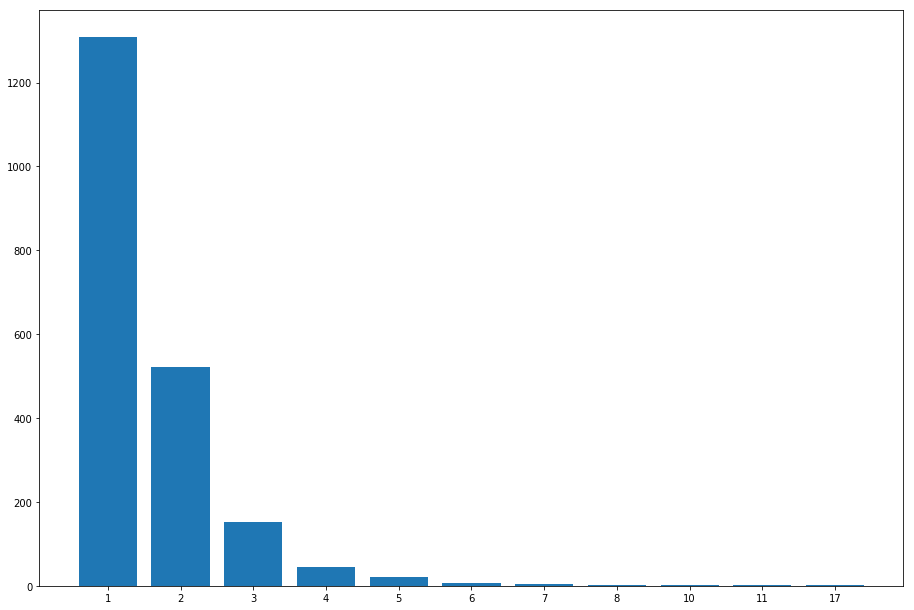

In [47]:

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
langs = records['student_semester'].astype(str)
students = records['COUNT']
ax.bar(langs,students)
plt.show()

quantidade de alunos por quantidade de vezes que cursaram a matéria 

In [31]:
select_query = "select COUNT, count(*) as countAux from (select id_student, count(*) as COUNT from student_course_subject as SCS INNER JOIN subjects as S on S.id = SCS.id_subject where name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES' group by id_student order by COUNT DESC) count_table group by COUNT;"

cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names

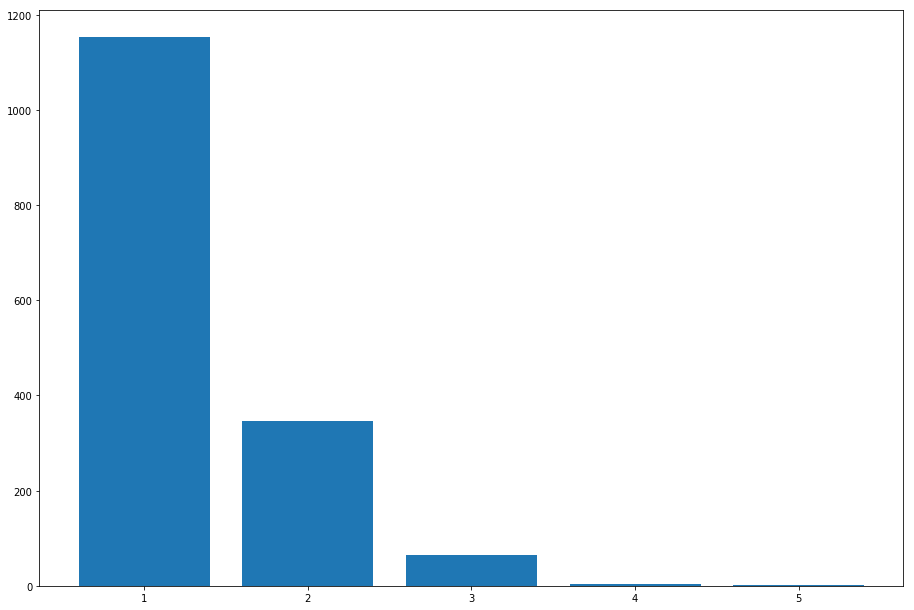

In [32]:

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
langs = records['COUNT']
students = records['countAux']
ax.bar(langs,students)
plt.show()

quantidade de alunos por Aprovação/Reprovação

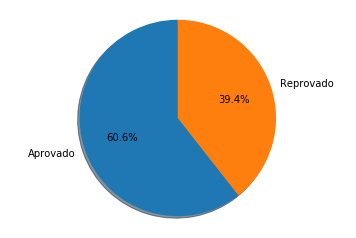

In [27]:
select_query = "select SUM(CASE WHEN num_score > 2 THEN 1 ELSE 0 END) as Passed, SUM(CASE WHEN num_score < 3 THEN 1 ELSE 0 END) as Failed, count(*) as Total from students as S INNER JOIN student_course_subject as SCS ON S.id = SCS.id_student INNER JOIN subjects as Sub ON Sub.id = SCS.id_subject where name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES';"

cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names


d = {'Label': ['Aprovado', 'Reprovado'], 'Value': [records['Passed'], records['Failed']]}
df = pd.DataFrame(data=d)

labels = df['Label']
sizes = df['Value']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

quantidade de alunos por nota

6 7


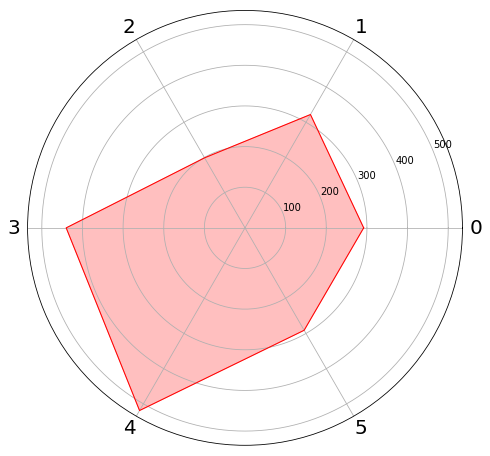

In [24]:
select_query = "select num_score, count(*) as COUNT from students as S INNER JOIN student_course_subject as SCS ON S.id = SCS.id_student INNER JOIN subjects as Sub ON Sub.id = SCS.id_subject where name = 'ALGORITMOS E PROGRAMACAO DE COMPUTADORES' group by num_score;"

cursor.execute(select_query)
records = pd.DataFrame(cursor.fetchall())
records.columns = cursor.column_names

categories = records['num_score'].tolist()
N = len(categories)

values = records['COUNT'].tolist()
values += values[:1]

print(N, len(values))
angles = [n / float(len(categories)) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='red', linewidth=1)
ax.fill(angles, values, color='red', alpha=0.25)

# plt.figure(figsize=(20, 18))
# plt.polar(angles, values)

plt.xticks(angles[:-1], categories, size=20)

plt.show()